# convolution operation

In [17]:
using PyPlot
using BenchmarkTools
using StaticArrays
using MLDatasets
using Images
#using TestImages
#using ImageView

In [18]:
#Pkg.add("TestImages")
#Pkg.add("ImageView")

In [19]:
#img = testimage("mandrill")
#imshow(img

### Using StaticArrays

In [20]:
using StaticArrays

In [21]:
aux = SVector(Tuple{2,3,4})

1-element SVector{1,DataType}:
 Tuple{2,3,4}

In [22]:
saux = SArray{Tuple{3}}(3,4,2)

3-element SVector{3,Int64}:
 3
 4
 2

In [23]:
aux = Array([3,4,2]);

In [24]:
@benchmark aux' * aux

BenchmarkTools.Trial: 
  memory estimate:  0 bytes
  allocs estimate:  0
  --------------
  minimum time:     32.404 ns (0.00% GC)
  median time:      32.432 ns (0.00% GC)
  mean time:        32.899 ns (0.00% GC)
  maximum time:     102.754 ns (0.00% GC)
  --------------
  samples:          10000
  evals/sample:     994

In [25]:
@benchmark saux' * saux

BenchmarkTools.Trial: 
  memory estimate:  0 bytes
  allocs estimate:  0
  --------------
  minimum time:     22.612 ns (0.00% GC)
  median time:      22.619 ns (0.00% GC)
  mean time:        22.866 ns (0.00% GC)
  maximum time:     77.590 ns (0.00% GC)
  --------------
  samples:          10000
  evals/sample:     996

In [26]:
filter = SArray{Tuple{3,3},Float64,2,9}((1, 1.0, 1, 1,2,2,0,0,0))

3×3 StaticArrays.SArray{Tuple{3,3},Float64,2,9}:
 1.0  1.0  0.0
 1.0  2.0  0.0
 1.0  2.0  0.0

In [27]:
res = zeros(3,3)

3×3 Array{Float64,2}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

In [28]:
@benchmark res .= filter .* filter

BenchmarkTools.Trial: 
  memory estimate:  96 bytes
  allocs estimate:  3
  --------------
  minimum time:     256.696 ns (0.00% GC)
  median time:      263.558 ns (0.00% GC)
  mean time:        287.405 ns (5.21% GC)
  maximum time:     11.603 μs (95.35% GC)
  --------------
  samples:          10000
  evals/sample:     355

In [29]:
f = [1.0  1.0  0.0
     1.0  2.0  0.0
     1.0  2.0  0.0]

3×3 Array{Float64,2}:
 1.0  1.0  0.0
 1.0  2.0  0.0
 1.0  2.0  0.0

In [30]:
@benchmark res .= f .* f

BenchmarkTools.Trial: 
  memory estimate:  96 bytes
  allocs estimate:  3
  --------------
  minimum time:     279.517 ns (0.00% GC)
  median time:      285.154 ns (0.00% GC)
  mean time:        307.022 ns (5.04% GC)
  maximum time:     14.539 μs (95.93% GC)
  --------------
  samples:          10000
  evals/sample:     292

In [31]:
#Mfilter = SMatrix{Float64}((1, 1.0, 1, 1,2,2,0,0,0))

#### Playing with MNIST

In [32]:
X_train = MLDatasets.MNIST.traindata()

([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [5, 0, 4, 1, 9, 2, 1, 3, 1, 4  …  9, 2, 9, 5, 1, 8, 3, 5, 6, 8])

In [33]:
im = X_train[1][:,:,2];

In [34]:
size(im)

(28, 28)

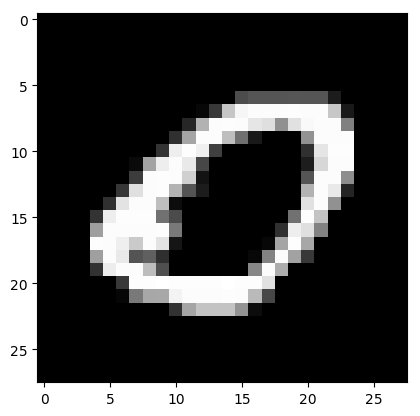

PyObject <matplotlib.image.AxesImage object at 0x12c982c10>

In [35]:
PyPlot.imshow(im, "gray")

In [36]:
aux = im

28×28 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0       0.0       …  0.0        0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0        0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0        0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0        0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0        0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0       …  0.0        0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0        0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0980392  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.501961   0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.988235   0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0       …  0.992157   0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.988235   0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.552941   0.0  0.0  0.0  0.0
 ⋮            

In [37]:
filter = [ [1. 0 0];
           [1. 0 0];
           [1. 0 0]]

3×3 Array{Float64,2}:
 1.0  0.0  0.0
 1.0  0.0  0.0
 1.0  0.0  0.0

In [38]:
patch = view(aux,1:3,1:3)

function convolve_filter_patch(filter, patch)
    return sum(patch .* filter)
end

@benchmark convolve_filter_patch(filter, patch)

BenchmarkTools.Trial: 
  memory estimate:  1.36 KiB
  allocs estimate:  29
  --------------
  minimum time:     9.687 μs (0.00% GC)
  median time:      10.221 μs (0.00% GC)
  mean time:        10.359 μs (0.00% GC)
  maximum time:     70.820 μs (0.00% GC)
  --------------
  samples:          10000
  evals/sample:     1

In [39]:
convolve_filter_patch(filter, patch)

0.0

#### Allocating memory

In [41]:
patch = view(aux,1:3,1:3)
filter_elementwise_patch = zeros(3,3)

function convolve_filter_patch!(filter_times_patch, filter, patch)
    filter_times_patch .= patch .* filter
    return sum(filter_times_patch)
end

@benchmark convolve_filter_patch!(filter_elementwise_patch, filter, patch)

BenchmarkTools.Trial: 
  memory estimate:  144 bytes
  allocs estimate:  5
  --------------
  minimum time:     361.957 ns (0.00% GC)
  median time:      372.957 ns (0.00% GC)
  mean time:        400.176 ns (3.90% GC)
  maximum time:     14.476 μs (94.66% GC)
  --------------
  samples:          10000
  evals/sample:     209


#### Apply convolution at all possible positions

Our toy image is 10 x 10, our filter is size 3.

- Do not use padding: The filter can be applied at 10-filter_size

We will get a feature map that is 

In [43]:
filter = [ [1. 0 0];
           [1. 0 0];
           [1. 0 0]]

height = size(aux,1)
width = size(aux,2)
filter_size = size(filter,1)
filter_size_ = filter_size - 1
filter_elemwise_patch = zeros(filter_size, filter_size)
output_map = zeros(height - filter_size, width - filter_size)

@benchmark begin
    for h in 1:height - filter_size
        for w in 1:width - filter_size
            patch = view(aux,h:(h + filter_size_),w:(w + filter_size_))
            output_map[w,h] = convolve_filter_patch!(filter_elemwise_patch, filter, patch)
        end
    end
end

BenchmarkTools.Trial: 
  memory estimate:  187.14 KiB
  allocs estimate:  5676
  --------------
  minimum time:     462.420 μs (0.00% GC)
  median time:      474.745 μs (0.00% GC)
  mean time:        521.909 μs (6.59% GC)
  maximum time:     5.326 ms (88.48% GC)
  --------------
  samples:          9545
  evals/sample:     1

In [44]:
size(output_map)

(25, 25)

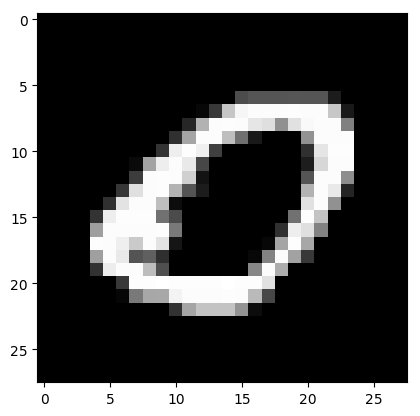

PyObject <matplotlib.image.AxesImage object at 0x12ff5d810>

In [45]:
PyPlot.imshow(im, "gray")

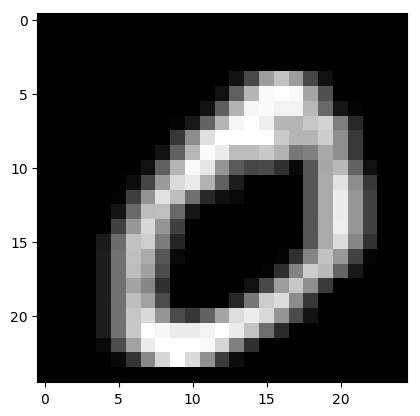

PyObject <matplotlib.image.AxesImage object at 0x135b28a90>

In [50]:
PyPlot.imshow(output_map, "gray")

#### try with another filter

In [51]:
filter = [ 1. 1 1 1 1 1
           0  0 0 0 0 0
           0  0 0 0 0 0
           0  0 0 0 0 0
           0  0 0 0 0 0    
           0  0 0 0 0 0]

6×6 Array{Float64,2}:
 1.0  1.0  1.0  1.0  1.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0

In [ ]:
height = size(aux,1)
width = size(aux,2)
filter_size = size(filter,1)
filter_size_ = filter_size - 1
filter_elemwise_patch = zeros(filter_size, filter_size)
output_map = zeros(height - filter_size, width - filter_size)

@benchmark begin
    for h in 1:height - filter_size
        for w in 1:width - filter_size
            patch = view(aux,h:(h + filter_size_),w:(w + filter_size_))
            output_map[w,h] = convolve_filter_patch!(filter_elemwise_patch, filter, patch)
        end
    end
end

In [ ]:
size(output_map)

In [ ]:
PyPlot.imshow(im, "gray")

In [ ]:
PyPlot.imshow(output_map, "gray")

#### Generating a concrete function

In [368]:
patch

3×3 SubArray{Float64,2,Array{Float64,2},Tuple{UnitRange{Int64},UnitRange{Int64}},false}:
 0.920668  0.145526  0.240649
 0.715469  0.488961  0.30598 
 0.191562  0.703797  0.942663

In [369]:
patch = view(aux,1:3,1:3)

function convolve_filter_patch2(filter, patch)
    return patch[1,1]* filter[1,1] + patch[1,2]* filter[1,2] + patch[1,3]* filter[1,3] + 
           patch[2,1]* filter[2,1] + patch[2,2]* filter[2,2] + patch[2,3]* filter[2,3] + 
           patch[3,1]* filter[3,1] + patch[3,2]* filter[3,2] + patch[3,3]* filter[3,3] 
end

convolve_filter_patch2 (generic function with 1 method)

In [370]:
patch = view(aux,1:3,1:3)

@benchmark convolve_filter_patch2(filter, patch)

BenchmarkTools.Trial: 
  memory estimate:  656 bytes
  allocs estimate:  38
  --------------
  minimum time:     1.432 μs (0.00% GC)
  median time:      1.670 μs (0.00% GC)
  mean time:        1.899 μs (5.27% GC)
  maximum time:     410.241 μs (97.83% GC)
  --------------
  samples:          10000
  evals/sample:     10

In [94]:
convolve_filter_patch2(filter, patch)

1.1928532956396172

#### Float32 test

In [95]:
aux32 = Array{Float32}(aux);

In [262]:
patch = view(aux32,1:3,1:3)
function convolve_filter_patch2(filter, patch)
    return patch[1,1]* filter[1,1] + patch[1,2]* filter[1,2] + patch[1,3]* filter[1,3] + 
           patch[2,1]* filter[2,1] + patch[2,2]* filter[2,2] + patch[2,3]* filter[2,3] + 
           patch[3,1]* filter[3,1] + patch[3,2]* filter[3,2] + patch[3,3]* filter[3,3] 
end

convolve_filter_patch2 (generic function with 1 method)

In [263]:
@benchmark convolve_filter_patch2(filter, patch)

BenchmarkTools.Trial: 
  memory estimate:  656 bytes
  allocs estimate:  38
  --------------
  minimum time:     1.468 μs (0.00% GC)
  median time:      1.523 μs (0.00% GC)
  mean time:        1.832 μs (4.25% GC)
  maximum time:     282.731 μs (95.85% GC)
  --------------
  samples:          10000
  evals/sample:     10

#### Fixing filter values

Accessing ```filter[i,j]``` takes some time, nevetheless the filter used at all positions in the image is the same. We could make the code more efficient by generating code that contains a fixed filter.

Let us write an example where for every ```i,j``` values  ```filter[i,j]``` is substituted by a float number (which could actually be the ```filter[i,j]``` value).

In [284]:
function convolve_filter_patch2_fixed_filter(filter, patch)
    return patch[1,1]*1.1 + patch[1,2]*1.2 + patch[1,3]*1.3 + 
           patch[2,1]*2.1 + patch[2,2]*2.2 + patch[2,3]*2.3 + 
           patch[3,1]*3.1 + patch[3,2]*3.2 + patch[3,3]*3.3
end

convolve_filter_patch2_fixed_filter (generic function with 2 methods)

In [265]:
@benchmark convolve_filter_patch2_fixed_filter(filter, patch)

BenchmarkTools.Trial: 
  memory estimate:  512 bytes
  allocs estimate:  29
  --------------
  minimum time:     1.207 μs (0.00% GC)
  median time:      1.260 μs (0.00% GC)
  mean time:        1.374 μs (1.71% GC)
  maximum time:     243.593 μs (96.26% GC)
  --------------
  samples:          10000
  evals/sample:     10

In [273]:
@benchmark convolve_filter_patch2_fixed_filter(filter, patched_array)

BenchmarkTools.Trial: 
  memory estimate:  512 bytes
  allocs estimate:  29
  --------------
  minimum time:     1.146 μs (0.00% GC)
  median time:      1.178 μs (0.00% GC)
  mean time:        1.236 μs (2.25% GC)
  maximum time:     287.574 μs (96.71% GC)
  --------------
  samples:          10000
  evals/sample:     10

Where does the overhead comes from? 

Notice that

- A bunch of float multiplications and sums is very cheap to compute

In [337]:
@benchmark  2.*2. + 2.*3. + 2.*12. + 2*2. + 2.*3. + 2.*12. + 2.*2. + 2.*3. + 2.*12.

BenchmarkTools.Trial: 
  memory estimate:  112 bytes
  allocs estimate:  7
  --------------
  minimum time:     37.857 ns (0.00% GC)
  median time:      41.977 ns (0.00% GC)
  mean time:        57.029 ns (21.31% GC)
  maximum time:     3.387 μs (94.10% GC)
  --------------
  samples:          10000
  evals/sample:     992

Accessing and summing elements from an array is much more expensive

In [319]:
@benchmark patch[1,1] + patch[1,2] + patch[1,3]+ 
           patch[2,1] + patch[2,2] + patch[2,3]+
           patch[3,1] + patch[3,2] + patch[3,3] 

BenchmarkTools.Trial: 
  memory estimate:  336 bytes
  allocs estimate:  20
  --------------
  minimum time:     931.292 ns (0.00% GC)
  median time:      964.896 ns (0.00% GC)
  mean time:        1.147 μs (3.53% GC)
  maximum time:     154.198 μs (96.58% GC)
  --------------
  samples:          10000
  evals/sample:     24

In [321]:
@benchmark patch[1:3,1:3]

BenchmarkTools.Trial: 
  memory estimate:  192 bytes
  allocs estimate:  3
  --------------
  minimum time:     103.218 ns (0.00% GC)
  median time:      111.305 ns (0.00% GC)
  mean time:        155.676 ns (16.07% GC)
  maximum time:     5.320 μs (93.67% GC)
  --------------
  samples:          10000
  evals/sample:     940

In [327]:
@benchmark sum(patch[1:3,1:3] .* filter)

BenchmarkTools.Trial: 
  memory estimate:  2.89 KiB
  allocs estimate:  60
  --------------
  minimum time:     26.850 μs (0.00% GC)
  median time:      27.901 μs (0.00% GC)
  mean time:        31.284 μs (1.32% GC)
  maximum time:     4.318 ms (95.72% GC)
  --------------
  samples:          10000
  evals/sample:     1

In [333]:
res = zeros(3,3)
@benchmark begin 
               res .= patch[1:3,1:3] .* filter;
               sum(res) 
           end

BenchmarkTools.Trial: 
  memory estimate:  336 bytes
  allocs estimate:  8
  --------------
  minimum time:     480.799 ns (0.00% GC)
  median time:      800.881 ns (0.00% GC)
  mean time:        877.103 ns (7.47% GC)
  maximum time:     29.499 μs (94.74% GC)
  --------------
  samples:          10000
  evals/sample:     194

The overhead comes from accessing the information in the patch!

### Example generated code

In [178]:
@generated function prod_dim_gen_impl{T, N}(x::Array{T, N})
        ex = :(1)
        for i = 1:N
             ex = :(size(x, $i) * $ex)
        end
        return ex 
end

prod_dim_gen_impl (generic function with 1 method)

In [180]:
function prod_dim_gen_impl{T, N}(x::Array{T, N})
    ex = :(1)
    for i = 1:N
        ex = :(size(x, $i) * $ex)
    end
    return ex 
end

prod_dim_gen_impl (generic function with 1 method)

In [201]:
prod_dim_gen_impl(rand(2,2))

:(size(x, 2) * (size(x, 1) * 1))

In [251]:
exp_ = prod_dim_gen_impl(rand(2,2,24))

:(size(x, 3) * (size(x, 2) * (size(x, 1) * 1)))

#### Playing with code generation

In [211]:
x = rand(4,3)
n = size(x,1)
ex = :(1)
    for i = 1:n
        ex = :(size(x, $i) * $ex)
    end

In [212]:
ex

:(size(x, 4) * (size(x, 3) * (size(x, 2) * (size(x, 1) * 1))))

In [213]:
ex = :(1)

1

In [248]:
:($ex * get(x,1,1))

:(1 * get(x, 1, 1))

In [249]:
get(x,1,1)

0.08125716248859183

In [250]:
x[1,1]

0.08125716248859183

## @generated convolution function for a given filter

Recall that julia can use metaprograming to build code that generates code

In [175]:
@generated function gen_convolve_filter_patch{N}(filter::Array{N}, patch::Array{N})
    ex = :(1)
    for i = 1:N
        for j = 1:N
            ex = :($filter[i,j] * patch[i,j] * $ex)
        end
    end
    return ex 
end

gen_convolve_filter_patch (generic function with 2 methods)

In [171]:
gen_convolve_filter_patch(filter, patch)

LoadError: [91mMethodError: no method matching size(::Type{SubArray{Float64,2,Array{Float64,2},Tuple{UnitRange{Int64},UnitRange{Int64}},false}}, ::Int64)[0m
Closest candidates are:
  size(::Any, ::Integer, [91m::Integer[39m, [91m::Integer...[39m) where N at abstractarray.jl:30
  size([91m::Char[39m, ::Any) at char.jl:14
  size([91m::BitArray{1}[39m, ::Any) at bitarray.jl:66
  ...[39m

In [101]:
@benchmark convolve_filter_patch3(filter, patch)

BenchmarkTools.Trial: 
  memory estimate:  656 bytes
  allocs estimate:  38
  --------------
  minimum time:     1.436 μs (0.00% GC)
  median time:      1.478 μs (0.00% GC)
  mean time:        1.701 μs (4.21% GC)
  maximum time:     280.962 μs (97.14% GC)
  --------------
  samples:          10000
  evals/sample:     10